Written by Santiagode Rey Juarez and Nikita Belooussov

Consider Treebank corpus.

Train HMM, TnT, perceptron and CRF models using the first 500, 1000, 1500, 2000, 2500 and 3000 sentences.

Evaluate the resulting 24 models using sentences from 3001.

In [ ]:
!pip install python-crfsuite

In [ ]:
import nltk
import pandas as pd
import seaborn as sns
import time

nltk.download('treebank')
train_data1 = nltk.corpus.treebank.tagged_sents()[:500]
train_data2 = nltk.corpus.treebank.tagged_sents()[:1000]
train_data3 = nltk.corpus.treebank.tagged_sents()[:1500]
train_data4 = nltk.corpus.treebank.tagged_sents()[:2000]
train_data5 = nltk.corpus.treebank.tagged_sents()[:2500]
train_data6 = nltk.corpus.treebank.tagged_sents()[:3000]
dataArray=[train_data1,train_data2,train_data3,train_data4,train_data5,train_data6]
test_data = nltk.corpus.treebank.tagged_sents()[3000:]

x=[500,1000,1500,2000,2500,3000]

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


In [ ]:
#CRF
CRF = nltk.tag.CRFTagger()
CRF_results = []
timeCRF=[]
eval_time_CRF=[]
for train_data in dataArray:
  print("trainded on", len(train_data))
  start_time = time.time()
  CRF.train(train_data,'crf_tagger_model')
  time_spent = time.time() - start_time
  timeCRF.append(time_spent)
  start_time = time.time()
  accuracy = round(CRF.evaluate(test_data), 3)
  eval_time = time.time() - start_time
  eval_time_CRF.append(eval_time)
  CRF_results.append(accuracy)
  print('accuracy: ' + str(accuracy))
  test=CRF.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])
  print(test)
  print("--- trained in %s seconds ---" % (time_spent))
  print("--- evaluated in %s seconds ---" % (eval_time))
  print("\n\n")


trainded on 500
accuracy: 0.91
[('the', 'DT'), ('men', 'NN'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 4.43401575088501 seconds ---
--- evaluated in 1.0408265590667725 seconds ---



trainded on 1000
accuracy: 0.925
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 11.470499515533447 seconds ---
--- evaluated in 0.8834707736968994 seconds ---



trainded on 1500
accuracy: 0.933
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 19.99679136276245 seconds ---
--- evaluated in 0.907804012298584 seconds ---



trainded on 2000
accuracy: 0.939
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 32.10358715057373 seconds ---
--- evaluated in 0.9139218330383301 seconds ---



trainded on 2500
accuracy: 0.943
[('the', 'DT'), ('men', 'NNS'), ('attended'

In [ ]:
#HMM example
trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
counter=1
HMM_results = []
timeHMM=[]
eval_time_HMM = []
for i in dataArray:
    print("trained on " + str(counter*500))
    start_time = time.time()
    HMM = trainer.train_supervised(i)
    time_spent = time.time() - start_time
    start_time = time.time()
    accuracy = round(HMM.evaluate(test_data), 3)
    eval_time = time.time() - start_time
    eval_time_HMM.append(eval_time)
    HMM_results.append(accuracy)
    print('accuracy: ' + str(accuracy))
    test=HMM.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])
    print(test)
    print("--- trained in %s seconds ---" % (time_spent))
    print("--- evaluated in %s seconds ---" % (eval_time))
    timeHMM.append(time_spent)
    print("\n\n")
    counter=counter+1


trained on 500
accuracy: 0.173
[('the', 'DT'), ('men', 'NNP'), ('attended', 'NNP'), ('to', 'NNP'), ('the', 'NNP'), ('meetings', 'NNP')]
--- trained in 0.20212769508361816 seconds ---
--- evaluated in 8.579485177993774 seconds ---



trained on 1000
accuracy: 0.221
[('the', 'DT'), ('men', 'NNP'), ('attended', 'NNP'), ('to', 'NNP'), ('the', 'NNP'), ('meetings', 'NNP')]
--- trained in 0.423386812210083 seconds ---
--- evaluated in 9.376102209091187 seconds ---



trained on 1500
accuracy: 0.262
[('the', 'DT'), ('men', 'NNS'), ('attended', 'NNP'), ('to', 'NNP'), ('the', 'NNP'), ('meetings', 'NNP')]
--- trained in 0.6250088214874268 seconds ---
--- evaluated in 10.018921136856079 seconds ---



trained on 2000
accuracy: 0.304
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 0.8606200218200684 seconds ---
--- evaluated in 10.307266235351562 seconds ---



trained on 2500
accuracy: 0.335
[('the', 'DT'), ('men', 'NNS'), ('att

In [ ]:
#TnT example
TnT = nltk.tag.tnt.TnT()
TnT_results = []
timeTnT=[]
eval_time_TnT = []
for train_data in dataArray:
  print("trainded on", len(train_data))
  start_time = time.time()
  TnT.train(train_data)
  time_spent = time.time() - start_time
  start_time = time.time()
  accuracy = round(TnT.evaluate(test_data), 3)
  eval_time = time.time() - start_time
  eval_time_TnT.append(eval_time)
  TnT_results.append(accuracy)
  print('accuracy: ' + str(accuracy))
  TnT.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])
  print(test)
  print("--- trained in %s seconds ---" % (time_spent))
  print("--- evaluated in %s seconds ---" % (eval_time))
  timeTnT.append(time_spent)
  print("\n\n")


trainded on 500
accuracy: 0.747
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 0.3065512180328369 seconds ---
--- evaluated in 17.582540273666382 seconds ---



trainded on 1000
accuracy: 0.796
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 0.5733785629272461 seconds ---
--- evaluated in 45.03550720214844 seconds ---



trainded on 1500
accuracy: 0.827
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 0.8096468448638916 seconds ---
--- evaluated in 73.73748540878296 seconds ---



trainded on 2000
accuracy: 0.848
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 1.076977252960205 seconds ---
--- evaluated in 92.5980179309845 seconds ---



trainded on 2500
accuracy: 0.862
[('the', 'DT'), ('men', 'NNS'), ('attende

In [ ]:
#perceptron
PER = nltk.tag.perceptron.PerceptronTagger(load=False)
counter=1
PER_results = []
timePER=[]
eval_time_PER = []
for i in dataArray:
    print("trained on " +str(counter*500))
    start_time = time.time()
    PER.train(i)
    time_spent = time.time() - start_time
    start_time = time.time()
    accuracy = round(PER.evaluate(test_data), 3)
    eval_time = time.time() - start_time
    eval_time_PER.append(eval_time)
    PER_results.append(accuracy)
    print('accuracy: ' + str(accuracy))
    test=PER.tag(['the', 'men', 'attended', 'to', 'the', 'meetings'])
    print(test)
    print("--- trained in %s seconds ---" % (time_spent))
    print("--- evaluated in %s seconds ---" % (eval_time))
    timePER.append(time_spent)
    print("\n\n")
    counter=counter+1

# sns.lineplot(x=x, y=PER_results)

trained on 500
accuracy: 0.914
[('the', 'DT'), ('men', 'NN'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 3.3177530765533447 seconds ---
--- evaluated in 1.7758727073669434 seconds ---



trained on 1000
accuracy: 0.932
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 6.700852155685425 seconds ---
--- evaluated in 1.791055679321289 seconds ---



trained on 1500
accuracy: 0.941
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 10.241178750991821 seconds ---
--- evaluated in 1.8359756469726562 seconds ---



trained on 2000
accuracy: 0.948
[('the', 'DT'), ('men', 'NNS'), ('attended', 'VBD'), ('to', 'TO'), ('the', 'DT'), ('meetings', 'NNS')]
--- trained in 14.11820673942566 seconds ---
--- evaluated in 1.8243582248687744 seconds ---



trained on 2500
accuracy: 0.95
[('the', 'DT'), ('men', 'NNS'), ('attended', '

Provide a figure with four learning curves, each per model type (X=training set size; Y=accuracy).

Which model would you select? Justify the answer.

In [ ]:
hmm_tag = ['HMM' for i in x]
tnt_tag = ['TnT' for i in x]
per_tag = ['PER' for i in x]
crf_tag = ['CRF' for i in x]
data = {'train size': [*x, *x, *x, *x],
        'accuracy': [*HMM_results, *TnT_results, *PER_results, *CRF_results],
        'model': [*hmm_tag, *tnt_tag, *per_tag, *crf_tag]}
df_accuracy = pd.DataFrame(data)

In [ ]:
hmm_tag = ['HMM' for i in x]
tnt_tag = ['TnT' for i in x]
per_tag = ['PER' for i in x]
crf_tag = ['CRF' for i in x]
data = {'train size': [*x, *x, *x, *x],
        'time': [*timeHMM, *timeTnT, *timePER, *timeCRF],
        'model': [*hmm_tag, *tnt_tag, *per_tag, *crf_tag]}
df_train_time = pd.DataFrame(data)

In [ ]:
hmm_tag = ['HMM' for i in x]
tnt_tag = ['TnT' for i in x]
per_tag = ['PER' for i in x]
crf_tag = ['CRF' for i in x]
data = {'train size': [*x, *x, *x, *x],
        'eval time': [*eval_time_HMM, *eval_time_TnT, *eval_time_PER, *eval_time_CRF],
        'model': [*hmm_tag, *tnt_tag, *per_tag, *crf_tag]}
df_eval_time = pd.DataFrame(data)

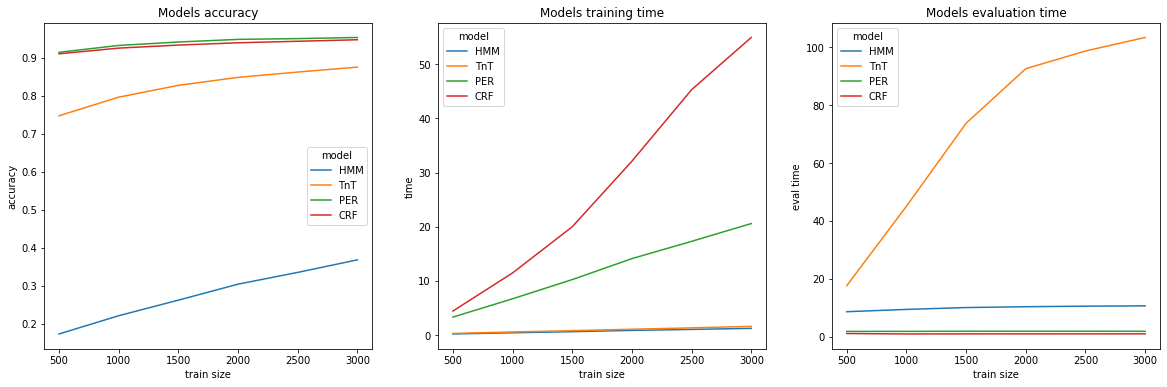

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.subplot(131)
sns.lineplot(data=df_accuracy, x='train size', y='accuracy', hue='model')
plt.title("Models accuracy")

plt.subplot(132)
sns.lineplot(data=df_train_time, x='train size', y='time', hue='model')
plt.title("Models training time")

plt.subplot(133)
sns.lineplot(data=df_eval_time, x='train size', y='eval time', hue='model')
plt.title("Models evaluation time")

plt.show()

Looking at the results, the most accurate model was the PER model, which was closely followed by the CRF model. Between these two the PER model is better because it performs better as well as trains faster than the CRF model and has a similar evaluation time to the CRF model. The two fastest training models were TNT and HMM models. Between these two it may be better to use the TNT model, because it is vastly more accurate than the HMM model. A drawback to the TNT model is that it takes much longer to evaluate its results, compared to the HMM model. As a result, it depends mainly on what you are prioritizing, if it is speed in training then it is the TNT model, if it is accuracy or the speed of evaluation then it is the PER model.